# Import lib


In [1]:
import pandas as pd
import numpy as np
import cv2

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# useful for getting number of output classes
from glob import glob

import matplotlib.pyplot as plt
from matplotlib import image
from PIL import Image

# Dataset

In [2]:
train_path = 'archive/colored_images_mod/train'
test_path = 'archive/colored_images_mod/test'

In [3]:
classes = glob('archive/colored_images_mod/train/*')

In [4]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range = 15,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   vertical_flip=True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [5]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 2929 images belonging to 5 classes.


In [6]:
test_set = test_datagen.flow_from_directory(test_path,
                                           target_size = (224, 224),
                                           batch_size = 32,
                                           class_mode = 'categorical')

Found 733 images belonging to 5 classes.


# Densenet169

In [7]:
Densenet_model = Sequential()

pretrained_model = tf.keras.applications.DenseNet169(
    include_top=False,
    weights="imagenet",
    input_shape=(224,224,3),
    pooling=None
)

for layers in pretrained_model.layers:
    layers.trainable = False

Densenet_model.add(pretrained_model)
Densenet_model.add(Flatten())
Densenet_model.add(Dense(256, activation='relu'))
Densenet_model.add(Dense(5, activation='softmax'))

In [8]:
Densenet_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet169 (Functional)     (None, 7, 7, 1664)        12642880  
_________________________________________________________________
module_wrapper (ModuleWrappe (None, 81536)             0         
_________________________________________________________________
module_wrapper_1 (ModuleWrap (None, 256)               20873472  
_________________________________________________________________
module_wrapper_2 (ModuleWrap (None, 5)                 1285      
Total params: 33,517,637
Trainable params: 20,874,757
Non-trainable params: 12,642,880
_________________________________________________________________


In [9]:
Densenet_model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [10]:
epochs=20
history = Densenet_model.fit(
  training_set,
  validation_data=test_set,
  epochs=epochs
)

Epoch 1/20
92/92 [==============================] - 101s 897ms/step - loss: 11.1434 - accuracy: 0.6279 - val_loss: 1.0751 - val_accuracy: 0.7599
Epoch 2/20
92/92 [==============================] - 46s 494ms/step - loss: 1.4200 - accuracy: 0.7190 - val_loss: 1.5582 - val_accuracy: 0.7244
Epoch 3/20
92/92 [==============================] - 51s 542ms/step - loss: 1.2564 - accuracy: 0.7429 - val_loss: 2.0345 - val_accuracy: 0.6862
Epoch 4/20
92/92 [==============================] - 42s 455ms/step - loss: 1.3415 - accuracy: 0.7351 - val_loss: 1.1666 - val_accuracy: 0.7244
Epoch 5/20
92/92 [==============================] - 33s 363ms/step - loss: 0.7773 - accuracy: 0.7723 - val_loss: 0.8036 - val_accuracy: 0.6930
Epoch 6/20
92/92 [==============================] - 34s 371ms/step - loss: 0.5996 - accuracy: 0.7849 - val_loss: 0.8322 - val_accuracy: 0.7040
Epoch 7/20
92/92 [==============================] - 35s 375ms/step - loss: 0.5379 - accuracy: 0.8003 - val_loss: 0.6429 - val_accuracy: 0.77

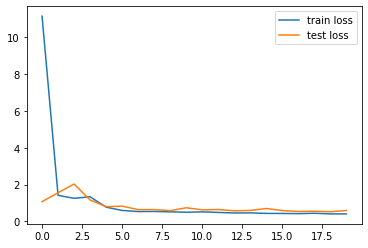

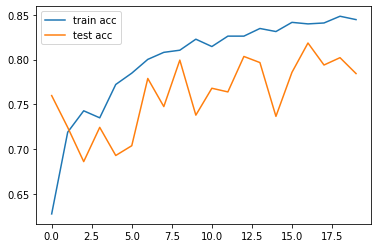

In [11]:
# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='test loss')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='test acc')
plt.legend()
plt.show()